In [3]:
from Lattes import Lattes
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from scipy import stats

Importando Módulos
Módulos Importados


In [4]:
SQL = '''

	select indicadores.id, 
		indicadores.tipo, 
		sum(qty) FILTER (WHERE ano <= 2014) AS qty_2014,
		sum(qty) FILTER (WHERE ano <= 2020) AS qty_2020,
		"Chamada" as chamada,
		"Processo" as processo, 
		pgtos 
        
	from demanda_bruta
	left join
			(select "Processo" as processo, sum("Valor Pago") as pgtos from pagamentos
			where "Processo" in (select "Processo" from demanda_bruta)
			group by "Processo") AS pgtos
		on demanda_bruta."Processo" = pgtos.processo
	left join indicadores
		on CAST(demanda_bruta.id as bigint) = indicadores.id
	inner join all_lattes
		on CAST(demanda_bruta.id as bigint) = all_lattes.id

    WHERE
		all_lattes.dt_atualizacao > '2020-01-01'
		and indicadores.tipo = '@ANO-DE-INICIO DOUTORADO '
		and demanda_bruta."Programa" = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA'
		and demanda_bruta."Chamada" = 'UNIVERSAL 2016 - FAIXA B'
	GROUP BY
		indicadores.id 
		,indicadores.tipo
		,demanda_bruta."Processo"
		,demanda_bruta."Chamada"
		,pgtos.pgtos
		,demanda_bruta."Programa"

'''

In [5]:
    from urllib.parse import urlencode,parse_qs
    parâmetros = {}
    parâmetros['chamada'] = 'UNIVERSAL 2016 - FAIXA B'
    parâmetros['programa'] = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA'
    parâmetros['CA'] = None
    parâmetros['área'] = None
    parâmetros['indicador'] = '@ANO-DE-INICIO DOUTORADO '
    parâmetros['data'] = '2020-01-01'
    path='d:/Lattes/Linnear Regression Models/'
    filename = path + urlencode(parâmetros, doseq=True)
    print(filename)

    est2.save(filename)
    

d:/Lattes/Linnear Regression Models/chamada=UNIVERSAL+2016+-+FAIXA+B&programa=PROGRAMA+BASICO+DE+ENGENHARIA+QUIMICA&CA=None&%C3%A1rea=None&indicador=%40ANO-DE-INICIO+DOUTORADO+&data=2020-01-01


NameError: name 'est2' is not defined

In [74]:
from urllib.parse import urlencode,parse_qs
queryStr = 'chamada=UNIVERSAL+2016+-+FAIXA+B&programa=PROGRAMA+BASICO+DE+ENGENHARIA+QUIMICA&CA=None&%C3%A1rea=None&indicador=%40ANO-DE-INICIO+DOUTORADO+&data=2020-01-01'
parse_qs(queryStr)

{'chamada': ['UNIVERSAL 2016 - FAIXA B'],
 'programa': ['PROGRAMA BASICO DE ENGENHARIA QUIMICA'],
 'CA': ['None'],
 'área': ['None'],
 'indicador': ['@ANO-DE-INICIO DOUTORADO '],
 'data': ['2020-01-01']}

In [82]:
from Lattes import Lattes
import psycopg2
from psycopg2.extensions import AsIs

In [91]:
    resultado = {
                'chamada': 'TESTE',
                'programa': 'PROGRAMA BASICO DE ENGENHARIA QUIMICA',
                'indicador': '@ANO-DE-INICIO DOUTORADO ',
                'data': '2020-01-01',
                'ca': None,
                'area': None,
                'total_investido': pd[pd['pgtos']!=0].pgtos.sum(),
                'media_investimento': pd[pd['pgtos']!=0].pgtos.mean(),
                'f_total': None,
                'f_pagtos': None,
                 'parametro_pgtos': None,
                 'f_qty_2014': None,
                 'parametro_qty_2014': None,
                 'f_const': None,
                 'parametro_const': None,
                 'r2': None
                }
    columns = resultado.keys()
    values = [resultado[column] for column in columns]
    insert_statement = 'insert into resultados_regressao_linear (%s) values %s'
    params = Database.config_db_connection()
    conn = psycopg2.connect(**params)
    cur = conn.cursor()
    sql = cur.mogrify(insert_statement, (AsIs(','.join(columns)), tuple(values)))
    cur.execute(insert_statement, (AsIs(','.join(columns)), tuple(values)))
    conn.commit()
    cur.close()
    print (sql)

b"insert into resultados_regressao_linear (chamada,programa,indicador,data,ca,area,total_investido,media_investimento,f_total,f_pagtos,parametro_pgtos,f_qty_2014,parametro_qty_2014,f_const,parametro_const,r2) values ('TESTE', 'PROGRAMA BASICO DE ENGENHARIA QUIMICA', '@ANO-DE-INICIO DOUTORADO ', '2020-01-01', NULL, NULL, 988697.5, 47080.833333333336, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL)"


In [6]:
engine = Carga.db_engine()
pd = pandas.read_sql(SQL, engine)

In [7]:
    média_investimento = pd[pd['pgtos']!=0].pgtos.mean()
    total_investido = float(pd[pd['pgtos']!=0].pgtos.sum())

In [8]:
type(total_investido)

float

In [9]:
pd['pgtos'] = pandas.to_numeric(pd['pgtos'].fillna(0))
pd['qty_2014'] = pandas.to_numeric(pd['qty_2014'].fillna(0))
pd['qty_2020'] = pandas.to_numeric(pd['qty_2020'].fillna(0))
pd

,id,tipo,qty_2014,qty_2020,chamada,processo,pgtos
0,88457363574989,@ANO-DE-INICIO DOUTORADO,2.0,2.0,UNIVERSAL 2016 - FAIXA B,431004/2016-1,0.0
1,127190896914089,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,420834/2016-8,0.0
2,164780267524163,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,407071/2016-4,0.0
3,171183220606416,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,420611/2016-9,0.0
4,278054122091940,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,403477/2016-6,0.0
...,...,...,...,...,...,...,...
143,9790871977193250,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,403419/2016-6,0.0
144,9856154294275621,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,421930/2016-0,43000.0
145,9913429373870610,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,404874/2016-9,25700.0
146,9933650905615452,@ANO-DE-INICIO DOUTORADO,1.0,1.0,UNIVERSAL 2016 - FAIXA B,402555/2016-3,0.0


In [10]:
type(pd)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='qty_2014'>

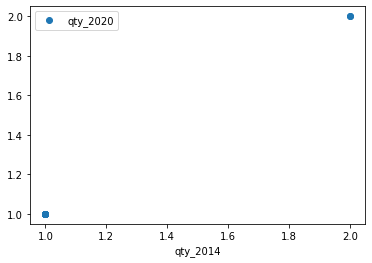

In [11]:
pd.plot(x='qty_2014', y='qty_2020', style='o')


In [12]:
X = pd[['pgtos', 'qty_2014']]

In [13]:
y = pd[['qty_2020']]

In [14]:
X


,pgtos,qty_2014
0,0.0,2.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
143,0.0,1.0
144,43000.0,1.0
145,25700.0,1.0
146,0.0,1.0


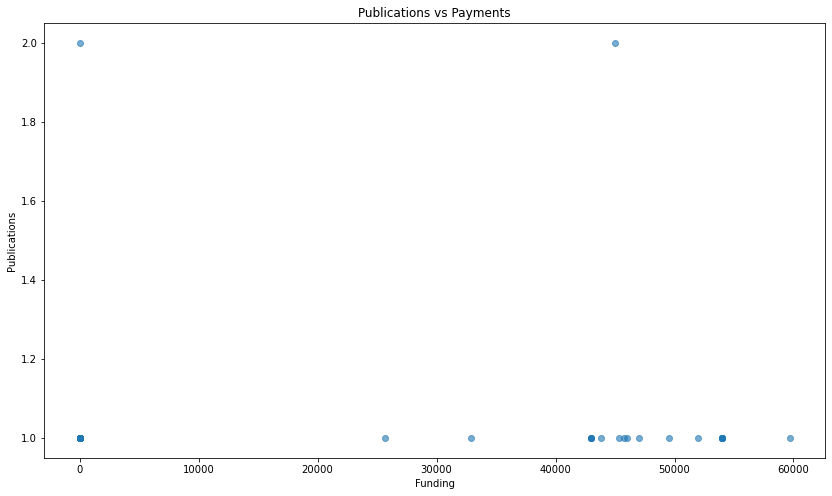

In [31]:
plt.figure(figsize=(14,8))
plt.scatter(X['pgtos'],y, alpha=0.6)
plt.title('Publications vs Payments')
plt.xlabel('Funding')
plt.ylabel('Publications')
#plt.ylim(0,1100)
#plt.xlim(0,1000000)
plt.show()

In [32]:
regression = LinearRegression()

In [33]:
regression.fit(X,y)

LinearRegression()

In [34]:
regression.coef_

array([[-1.36799692e-22,  1.00000000e+00]])

In [35]:
regression.intercept_

array([-2.22044605e-16])

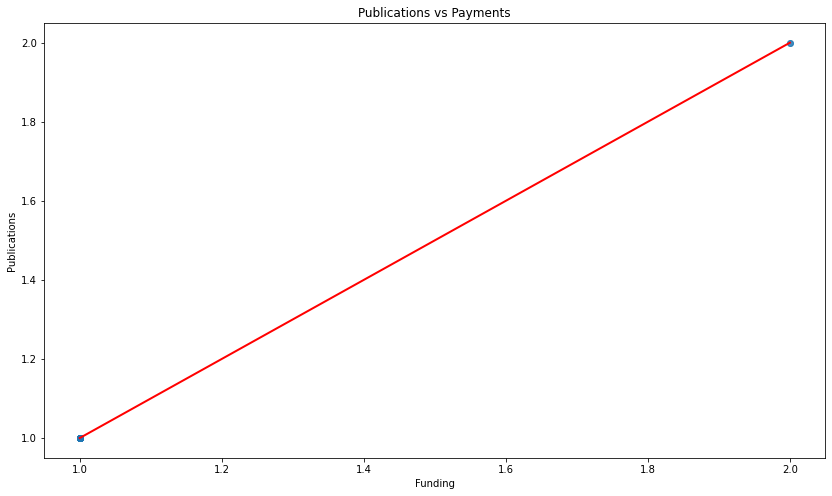

In [36]:
plt.figure(figsize=(14,8))
plt.scatter(X['qty_2014'],y, alpha=0.6)
plt.plot(X['qty_2014'], regression.predict(X), color="red", linewidth=2)
plt.title('Publications vs Payments')
plt.xlabel('Funding')
plt.ylabel('Publications')
#plt.ylim(0,1100)
#plt.xlim(0,1000000)
plt.show()

In [37]:
score = regression.score(X,y)

In [38]:
score

1.0

In [15]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               qty_2020   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.836e+31
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:03:57   Log-Likelihood:                 5119.6
No. Observations:                 148   AIC:                        -1.023e+04
Df Residuals:                     145   BIC:                        -1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.996e-16   1.69e-16      2.962      0.0

C:\Python\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
 est2.pvalues['pgtos']<0.1

True

In [41]:
pd[pd['pgtos']!=0].pgtos.mean()

47080.833333333336

In [42]:
est2.rsquared

1.0

In [43]:
dir(est2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [51]:
est2.params

const       4.996004e-16
pgtos       5.293956e-21
qty_2014    1.000000e+00
dtype: float64

In [52]:
est2.pvalues

const       0.003576
pgtos       0.000009
qty_2014    0.000000
dtype: float64

In [54]:
est2.rsquared

1.0

In [63]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               qty_2020   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.836e+31
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:15:37   Log-Likelihood:                 5119.6
No. Observations:                 148   AIC:                        -1.023e+04
Df Residuals:                     145   BIC:                        -1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.996e-16   1.69e-16      2.962      0.0

In [62]:
est2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     1.000      
Dependent Variable: qty_2020         AIC:                -10233.2389
Date:               2022-03-04 10:14 BIC:                -10224.2473
No. Observations:   148              Log-Likelihood:     5119.6     
Df Model:           2                F-statistic:        1.836e+31  
Df Residuals:       145              Prob (F-statistic): 0.00       
R-squared:          1.000            Scale:              5.3724e-32 
--------------------------------------------------------------------
          Coef.  Std.Err.           t           P>|t|  [0.025 0.975]
--------------------------------------------------------------------
const     0.0000   0.0000                2.9617 0.0036 0.0000 0.0000
pgtos     0.0000   0.0000                4.6054 0.0000 0.0000 0.0000
qty_2014  1.0000   0.0000 6022582358160538.0000 0.0000 1.0000 1.0000
--------------------------------------------------------------------
Omnibus:              39.493        Durbin-Watson:           0.551  
Prob(Omnibus):        0.000         Jarque-Bera (JB):        503.223
Skew:                 -0.367        Prob(JB):                0.000  
Kurtosis:             12.004        Condition No.:           222780 
====================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
dir(est2.save)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [65]:
type(est2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [114]:
chamada = 'UNIVERSAL 2016 - FAIXA B'
programa = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA'
CA = None
área = None
indicador = '@ANO-DE-INICIO CURSO-TECNICO-PROFISSIONALIZANTE '
data = '2020-01-01'
path='d:/Lattes/Linnear Regression Models/'

In [118]:
import os

In [119]:
    parâmetros = {}
    parâmetros['chamada'] = chamada
    parâmetros['programa'] = programa
    parâmetros['CA'] = CA
    parâmetros['área'] = área
    parâmetros['indicador'] = indicador
    parâmetros['data'] = data

In [121]:
    filename = path + urlencode(parâmetros, doseq=True)
    os.path.isfile(filename)

True

In [110]:
lista_indicadores[0][0]

0

In [128]:
SQL = f'''
        SELECT count(*) 
        FROM resultados_regressao_linear
        WHERE
'''
if not chamada == None: SQL += f'''\n            chamada = '{chamada}' and'''
if not programa == None: SQL += f'''            programa = '{programa}' and'''
if not ca == None: SQL += f'''            ca = '{ca}' and'''
if not area == None: SQL += f'''            area = '{area}' and'''
if not indicador == None: SQL += f'''            indicador = '{indicador}' and'''
if not data == None: SQL += f'''            data = '{data}' and'''
SQL += '\n            1 = 1'
    
conn = None
try:
    params = Database.config_db_connection()
    conn = psycopg2.connect(**params)
    cur = conn.cursor()
    cur.execute(SQL)
    lista_indicadores = cur.fetchall()
    conn.commit()
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print (error)
finally:
    if conn is not None:
        conn.close()

In [124]:
print(SQL)


        SELECT count(*) 
        FROM resultados_regressao_linear
        WHERE
            chamada = 'UNIVERSAL 2016 - FAIXA B' and
            programa = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA' and
            ca = 'None' and
            area = 'None' and
            indicador = '@ANO-DE-INICIO CURSO-TECNICO-PROFISSIONALIZANTE ' and
            data = '2020-01-01'
        


In [1]:
lista_indicadores[0][0]

NameError: name 'lista_indicadores' is not defined

In [16]:
est2

In [17]:
est2.pvalues['const']

0.0035759714123511244

In [18]:
est2.pvalues.get('const')

0.0035759714123511244